# Linear Algebra I

In the first two tutorials, we will look at some basic definitions and properties of linear algebra, and their implementations and a few applications using python and NumPy (https://numpy.org/) in Jupyter notebook (https://jupyter.org/).

In the first session, we are going to look at vectors, and in the next session, we will look at matrices.

First, let us firstly import some useful libraries...

In [32]:
!pip install matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Basic properties

Vectors are one of the most basic and important objects in linear algebra. We have already looked at what a vector space is, as well some other basic definitions. Throughout this tutorial, we are going to assume that our vector space is over the complex field $\mathbb{R}$, i.e., we assume that all the entries in the vectors are real numbers. 

#### Exercise: determine for each of the following sets whether they are vector spaces or not.
- $\left\{\begin{bmatrix} 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \end{bmatrix}\right\}$ 
- $\mathbb{R}^n$
- $\{(x, y, z)\in \mathbb{R}^3\;|\;x+y+z = 1\}$

You will probably be familiar with the fact that there are rules which govern the dimension fo the vector. For example, if $V$ is $\mathbb{R}^n$, then $\vec{v}\in \mathbb{C}^{n}$ is an $n$-dimensional vector. In python, an $n$-dimensional vector is represented by a $n\times 1$-dimensional array (tensor). 


### Creating a vector

In Python, they are represented using arrays. For instance, say we have two vectors $\vec{v}$ and $\vec{s}$, defined as:
$$
\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}
\begin{equation}\vec{s} = \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}
$$

#### Run the cell below to create and visualise two vectors $\vec{v}$ and $\vec{s}$:

[-3  2]


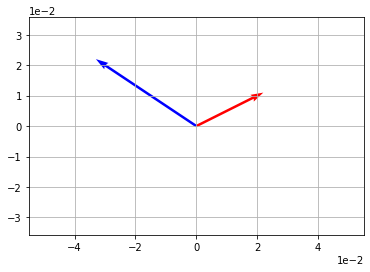

In [33]:
v = np.array([2,1])
s = np.array([-3,2])
print(s)

# Plot v and s
vecs = np.array([v,s])
origin = [[0,0], [0,0]]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b'], scale=10)
plt.show()

One of the most basic thing we could do is vector addition

$$\begin{equation}\vec{z} = \vec{v}+\vec{s} = \begin{bmatrix}-1 \\ 3 \end{bmatrix}\end{equation}$$

Let us verify that Python gives the same results:

[-1  3]


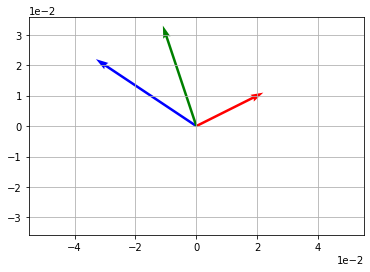

In [34]:
z = v + s
print(z)
vecs = np.array([v,s,z])
origin = [0, 0, 0], [0, 0, 0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b', 'g'], scale=10)
plt.show()

## Vector multiplication

Three types of vector multiplication exist
- Scalar multiplication
- Dot product
- Cross product

### Scalar multiplication
Multiplying a vector by a scalar, which is equivalent to multiply each component of the vector by the same scalar. Assume that we have a vector $\vec{v} = \begin{bmatrix} v_{1}\\v_{2}\end{bmatrix} \in \mathbb{C}^2$. Then multiplying $\vec{v}$ by a scalar $\lambda \in \mathbb{C}$ we have

$$\begin{equation} \lambda\vec{v} = \lambda\begin{bmatrix} v_{1}\\v_{2}\end{bmatrix} = \begin{bmatrix} \lambda v_{1}\\\lambda v_{2}\end{bmatrix}\end{equation}$$

Note that division is equivalent to the scalar multiplication with the reciprocal of the divisor, this is allowed since $\mathbb{C}$ is a field, and cannot be done if $\vec{v}\in\mathbb{Z}^{n}$.

### Dot product
In vector spaces, this is also known as inner product, which takes in two vectors in $\mathbb{F}^n$ ($\mathbb{F}$ can be $\mathbb{C}, \mathbb{R}, \dots$), and return a scalar in $\mathbb{F}$ as 
$$
\begin{equation} \vec{v}\cdot\vec{w} = \langle v, w \rangle = \vec{v}^T\vec{w} = \sum_{i=1}^{n}v_{i}w_{i}\end{equation}
$$
In NumPy, dot product can be implemented using numpy.dot() function (note that in Python 3.5 or later, one can use the @ operator for computing the dot product). 

#### Exercise: choose two 2-dimensional vectors (say $\begin{bmatrix} 2 \\ 3\end{bmatrix}$ and $\begin{bmatrix} -3 \\ 2\end{bmatrix}$), compute their dot product by hand, then calculate their dot product using python. Check if they match.

In [35]:
v = np.array([2,3])
s = np.array([-3,2])
d = np.dot(v,s)
print (d)

0


### Projection
A projection is a linear transformation $P: V \rightarrow V$ such that $P^2 = P$

### Orthogonality
Two vectors $v_{1}, v_{2}\in V$ are _orthogonal_ if their dot product is $0$, i.e. $v_{1}\cdot v_{2} = 0$. 

In Euclidean settings, two vectors are orthogonal if they are perpendicular.

A set of vectors $S = \{v_{1}, \dots, v_{m}\}$ in $\mathbb{R}^n$, with the dot product, is said to be orthogonal if 

$$\begin{equation}
v_{i}\cdot v_{j} = \begin{cases} \sum_{l=1}^{n}v_{il}v_{jl} & \text{ if} i = j \\
0 & \text{ if} i \neq j
\end{cases}
\end{equation}$$

If in addition all the vectors in $S$ have magnitude 1, i.e. $v_{i}\cdot v_{j} = \delta_{ij}$, we say that S is __orthonormal__.

#### Exercise: check if the following sets of vectors are orthogonal (orthonormal) or not (either by hand or using python):
- $\left\{\begin{bmatrix}1\\0\end{bmatrix}, \begin{bmatrix}1\\3\end{bmatrix}\right\}$
- $\left\{\begin{bmatrix}1\\0\\2\\1\end{bmatrix}, \begin{bmatrix}2\\3\\-2\\2\end{bmatrix}, \begin{bmatrix}1\\0\\0\\-1\end{bmatrix}\right\}$
- $\left\{e_{j}\;|\;j = 1, \dots, n, \text{ where } e_{jk} = \delta_{jk}\right\}$  
(Note: $\delta$ here is the [Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta) i.e. a function that is 1 when its two subscripts are equal and 0 otherwise.)

### Alternative interpretation of dot product
Note that geometrically, we could interpret dot product as the length of the projection of one vector onto another, i.e., we could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 

Proof is simple and omitted at this instance.

### Cross product
Cross product of $\vec{v}$ and $\vec{s}$ can be interpreted as finding a vector $\vec{w}$ such that $\vec{w}$ is perpendicular to the two vectors. Hence naturally this can only be done in vector spaces with three or more dimensions. Cross product can be implemented using _numpy.cross()_ function. Note that the cross product is only defined in three dimensions. Therefore, the _numpy.cross()_ function plays various tricks to expand 2D vectors into 3D, and then takes subsets of 3D vectors to return answers.

## Application: Gram-Schmidt process
Gram-Schmidt process is a method for orthogonalising (orthonormalising) a set of vectors (commonly) in $\mathbb{R}^n$ with the standard dot product. The Gram-Schmidt process takes a finite, linearly independent set $S = \{v_{1}, \dots, v_{m}\}$ for $m \leq n$ and generates an orthogonal set $S' = \{u_{1}, \dots, u_{k}\}$ which forms an orthogonal (orthonormal) basis of the $k$-dimensional subspace of $\mathbb{R}^n$.

We firstly define the projection operator from a vector $v$ to another vector $u$ by
\begin{equation}
\text{proj}_{u}(v) = \frac{v\cdot u}{u\cdot u}\cdot u
\end{equation}

This projection operator projects the vector $v$ orthogonally onto the line spanned by the vector $u$.

#### Exercise: check (by hand) that $\text{proj}_{u}(v)$ as defined above is indeed a projection

The Gram-Schmidt process then works as follows:
\begin{align*}
&u_{1} = v_{1},  & e_{1} = \frac{u_{1}}{||u_{1}||}\\
&u_{2} = v_{2} - \text{proj}_{u_{1}}(v_{2}), & e_{2} = \frac{u_{2}}{||u_{2}||}\\
&u_{3} = v_{3} - \text{proj}_{u_{1}}(v_{3}) - \text{proj}_{u_{2}}(v_{3}), & e_{3} = \frac{u_{2}}{||u_{2}||}\\
&\vdots &\vdots\\
&u_{k} = v_{k} - \sum_{j=1}^{k-1}\text{proj}_{u_{j}}(v_{k}), & e_{k} = \frac{u_{k}}{||u_{k}||}
\end{align*}

The set $\{u_{1}, \dots, u_{k}\}$ is the output orthogonal basis, and the normalised set $\{e_{1}, \dots, e_{k}\}$ is the output orthonormal basis set. 

Given the procedure and the definition of projection operator, it is easily verified that $u_{1}\cdot u_{2} = 0$, then using this to compute $u_{1}\cdot u_{3} = 0$ as well. A general proof requires induction and is omitted in the case. For detailed proof, please refer to e.g. [Golub, Gene H.; Van Loan, Charles F. (1996)].

### Exercises: write a python function that takes in 3 linearly independent 4-dimensional vectors and return a orthogonal basis using Gram-Schmidt process

In [36]:
def proj(u, v):
    return np.dot(u, v) / np.dot(u, u) * u

def gramSchmidt(v1, v2, v3):
    '''
    Input: v1, v2, v3 are three linearly independent 4-dimensional vectors
    Return: u1, u2, u3, a set of three orthogonal 4-dimensional vectors using GS process
    '''
    # TODO: compute u1, u2 and u3 using the projection operator and GS process
    u1 = v1
    u2 = v2 - proj(u1, v2)
    u3 = v3 - proj(u1, v3) - proj(u2, v3)
    return u1, u2, u3

### Exercise: run a few experiments using your written function, check if it gives correct results by checking with your own workout.

### Exercise: change the function so that the new function does GS-orthonormalisation.

In [37]:
import sympy

def is_orthonormal(v1, v2, v3):
    augmented_matrix = np.array([v1, v2, v3])
    _, indices = sympy.Matrix(augmented_matrix).T.rref()
    return len(indices) == 3

def gen_test():
    v1, v2, v3 = np.random.rand(3, 4)
    while not is_orthonormal(v1, v2, v3):
        v1, v2, v3 = np.random.rand(3, 4)
    return v1, v2, v3

for i in range(1000):
    assert is_orthonormal(*gramSchmidt(*gen_test()))
